In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
list_movie= pd.read_csv(".\df_final_movie_imdb_01.csv")

In [3]:
budget_effect=list_movie.loc[:,["budget","imdb_score","gross"]]

In [4]:
def normalizing_features (df):
    new_df=(df-df.mean())/df.std()
    return new_df 

In [5]:
budget_effect["normalized_budget"]=normalizing_features (budget_effect["budget"])

In [6]:
lm=LinearRegression()
lm.fit(budget_effect[["normalized_budget"]],budget_effect[["imdb_score"]])
y_hat=lm.predict(budget_effect[["normalized_budget"]])
b=lm.intercept_
a=lm.coef_

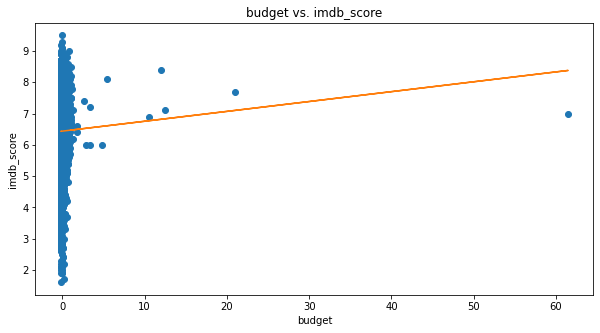

In [7]:
plt.figure(figsize=(10,5))
plt.scatter (budget_effect[["normalized_budget"]],budget_effect[["imdb_score"]])
plt.title("budget vs. imdb_score")
plt.xlabel("budget")
plt.ylabel("imdb_score")
plt.plot(budget_effect[["normalized_budget"]], y_hat, '-', color='C1')
plt.show()

#The budget has outliers:

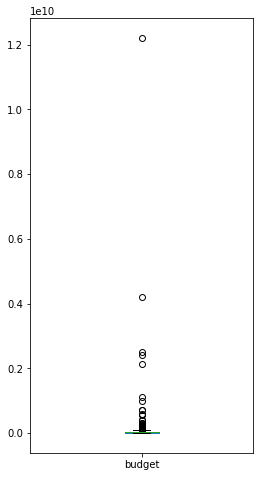

In [8]:
budget_effect[["budget"]].plot(kind="box", figsize=(4,8))

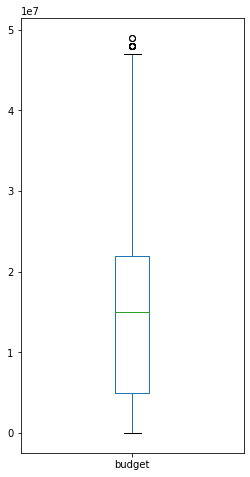

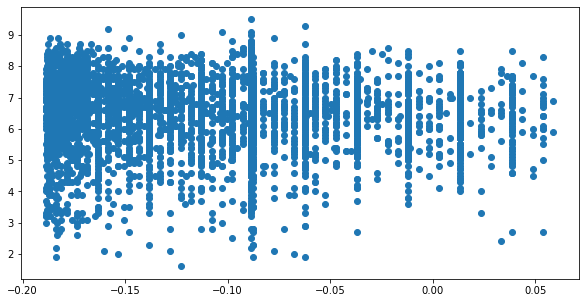

In [9]:
#remove autlier from budget
def find_IQR (df):
    sort=sorted(df)
    Q1=sort[int(len(sort)*0.25)]
    Q3=sort[int(len(sort)*0.75)]
    return(Q3-Q1)

budget_IQR=find_IQR (budget_effect["budget"])
#out[]: 33000000.0
bgt_effect_no_out = pd.DataFrame(budget_effect[budget_effect["budget"] <= budget_IQR*1.5])

bgt_effect_no_out[["budget"]].plot(kind="box", figsize=(4,8))

plt.figure(figsize=(10,5))
plt.scatter (bgt_effect_no_out[["normalized_budget"]],bgt_effect_no_out[["imdb_score"]])

In [10]:
#normalize new data:
bgt_effect_no_out["normalized_budget"]=normalizing_features(bgt_effect_no_out["budget"].values)


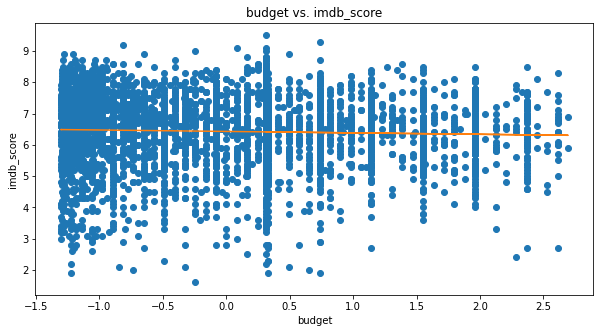

In [11]:
lm=LinearRegression()
lm.fit(bgt_effect_no_out[["normalized_budget"]],bgt_effect_no_out[["imdb_score"]])
y_hat=lm.predict(bgt_effect_no_out[["normalized_budget"]])
b=lm.intercept_
a=lm.coef_

plt.figure(figsize=(10,5))
plt.scatter (bgt_effect_no_out[["normalized_budget"]],bgt_effect_no_out[["imdb_score"]])
plt.title("budget vs. imdb_score")
plt.xlabel("budget")
plt.ylabel("imdb_score")
plt.plot(bgt_effect_no_out[["normalized_budget"]], y_hat, '-', color='C1')
plt.show()

In [12]:
lm.score(bgt_effect_no_out[["normalized_budget"]],bgt_effect_no_out[["imdb_score"]])

0.001559554447504885

In [13]:
bgt_effect_no_out[["normalized_budget", "imdb_score"]].corr(method="pearson")

,normalized_budget,imdb_score
normalized_budget,1.000000,-0.039491
imdb_score,-0.039491,1.000000


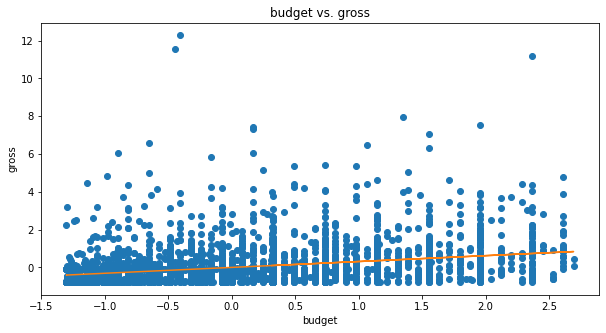

In [14]:
#check if budget relates to gross:
bgt_effect_no_out["normalized_gross"]=normalizing_features (bgt_effect_no_out["gross"].values)
    
lm.fit(bgt_effect_no_out[["normalized_budget"]],bgt_effect_no_out[["normalized_gross"]])
y_hat=lm.predict(bgt_effect_no_out[["normalized_budget"]])
b=lm.intercept_
a=lm.coef_

plt.figure(figsize=(10,5))
plt.scatter (bgt_effect_no_out[["normalized_budget"]],bgt_effect_no_out[["normalized_gross"]])
plt.title("budget vs. gross")
plt.xlabel("budget")
plt.ylabel("gross")
plt.plot(bgt_effect_no_out[["normalized_budget"]], y_hat, '-', color='C1')
plt.show()


In [15]:
lm.score(bgt_effect_no_out[["normalized_budget"]],bgt_effect_no_out[["normalized_gross"]])
bgt_effect_no_out[["normalized_budget", "normalized_gross"]].corr(method="pearson")

,normalized_budget,normalized_gross
normalized_budget,1.000000,0.310695
normalized_gross,0.310695,1.000000
